In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/Carpov/Data_set/

/content/drive/MyDrive/Colab Notebooks/Carpov/Data_set


### Загрузим уже обработанные в прошлом ДЗ данные!

In [4]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода.

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [5]:
### Центрируем данные
### Your code is here
X_centered = X - X.mean()


In [6]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
X_pca = pd.DataFrame(X_pca, columns = ['Pca_1', 'Pca_2'])

X_pca.head()

,Pca_1,Pca_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


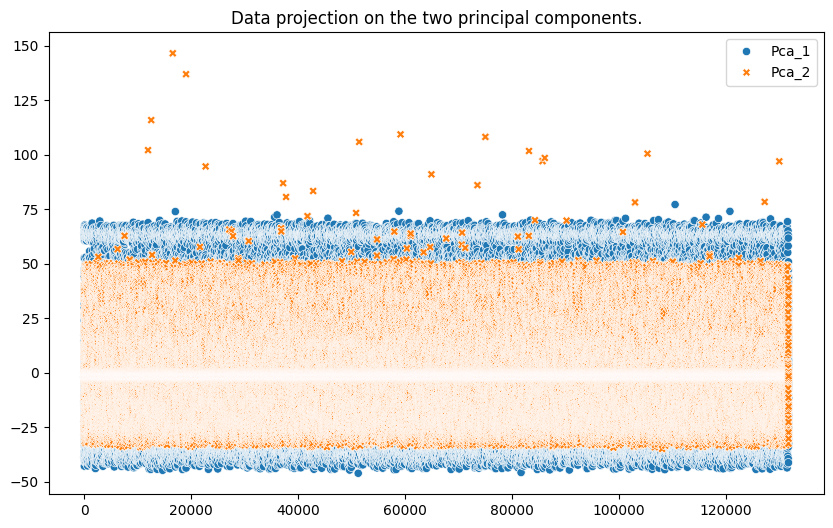

In [7]:
### Изобразим точки в новом пространстве


plt.figure(figsize=(10, 6))

plt.title("Data projection on the two principal components.")
sns.scatterplot([X_pca['Pca_1'], X_pca['Pca_2']]);

In [8]:
print(f"First and second components explains {pca.explained_variance_ratio_} of D")

First and second components explains [0.63176117 0.21129863] of D


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


<Axes: >

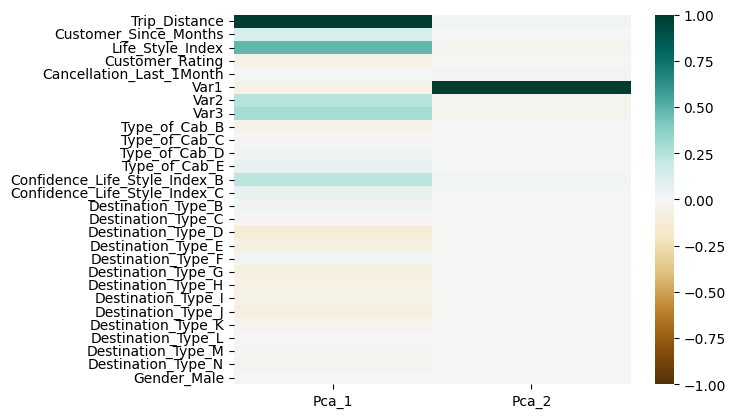

In [9]:
### Your code is here
pca_1_corrs = X.corrwith(X_pca['Pca_1'])
pca_2_corrs = X.corrwith(X_pca['Pca_2'])

corrs = pd.concat((pca_1_corrs, pca_2_corrs), axis = 1)
corrs.columns = ['Pca_1', 'Pca_2']

sns.heatmap(corrs,
            xticklabels= corrs.columns,
            yticklabels = corrs.index,
            cmap = 'BrBG',
            vmin = -1,
            vmax = 1)


In [10]:
pca_2_corrs[pca_2_corrs >= 0.5]

Var1    0.9986
dtype: float64

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

<Axes: title={'center': 'Data projection of 2 compoents'}, xlabel='Pca_1', ylabel='Pca_2'>

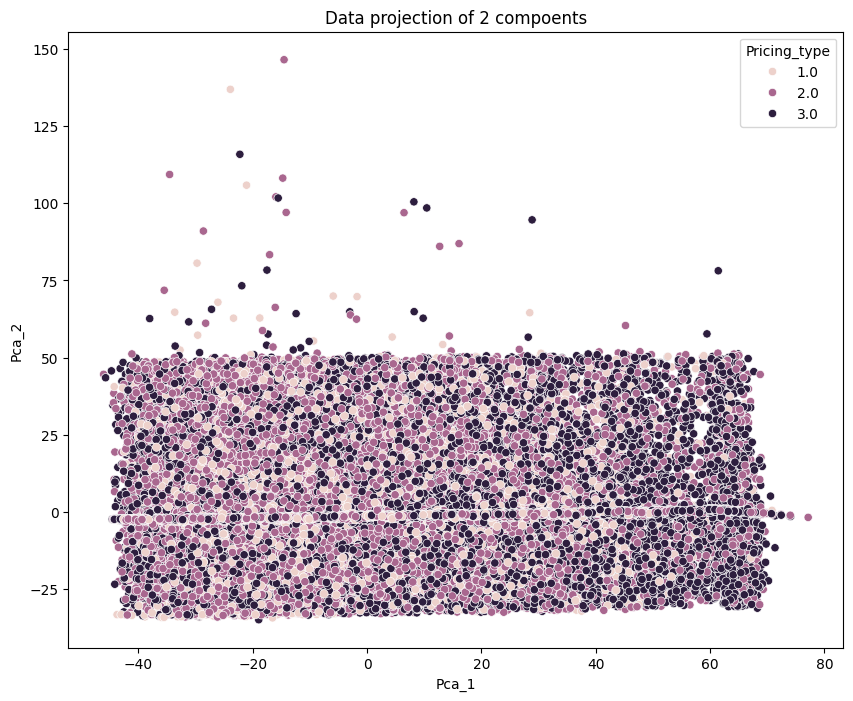

In [11]:
### Your code is here
PCA_df = np.concatenate((X_pca.values, y.values.reshape(-1,1)), axis = 1)
PCA_df = pd.DataFrame(PCA_df, columns = ['Pca_1', 'Pca_2', 'Pricing_type'])

plt.figure(figsize = (10,8))
plt.title('Data projection of 2 compoents')
sns.scatterplot(PCA_df, x ='Pca_1', y = 'Pca_2', hue = 'Pricing_type')



Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [12]:
### Your code is here
pca = PCA(n_components = 3)
X_pca3 = pca.fit_transform(X_centered)
X_pca3 = pd.DataFrame(X_pca3, columns = ['Pca_1', 'Pca_2', 'Pca_3'])

PCA_df3 = np.concatenate((X_pca3.values, y.values.reshape(-1,1)), axis = 1)
PCA_df3 = pd.DataFrame(PCA_df3, columns = ['Pca_1', 'Pca_2', 'Pca_3', 'PricingType'])

PCA_df3.head()


,Pca_1,Pca_2,Pca_3,PricingType
0,-38.743132,-23.282634,-11.303274,2.0
1,-13.209252,-25.023815,5.664106,2.0
2,-2.004910,-1.637085,3.663032,2.0
3,17.178458,-0.907657,-3.191676,3.0
4,14.477389,-11.656752,22.999348,2.0


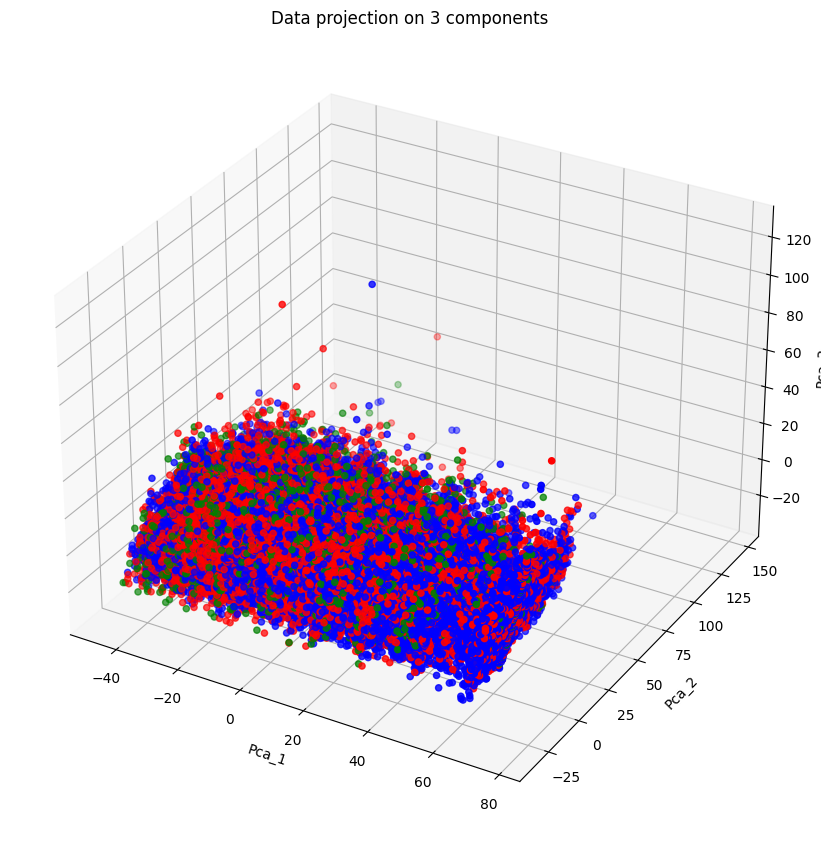

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig  = plt.figure(figsize = (10,8))
ax = Axes3D(fig, auto_add_to_figure = False)
fig.add_axes(ax)

plt.title('Data projection on 3 components')
ax.set_xlabel('Pca_1')
ax.set_ylabel('Pca_2')
ax.set_zlabel('Pca_3')

colors = PCA_df3['PricingType'].replace([1,2,3], ['green', 'red', 'blue'])
ax.scatter(PCA_df3['Pca_1'],
           PCA_df3['Pca_2'],
           PCA_df3['Pca_3'],
           c = colors)


<Axes: >

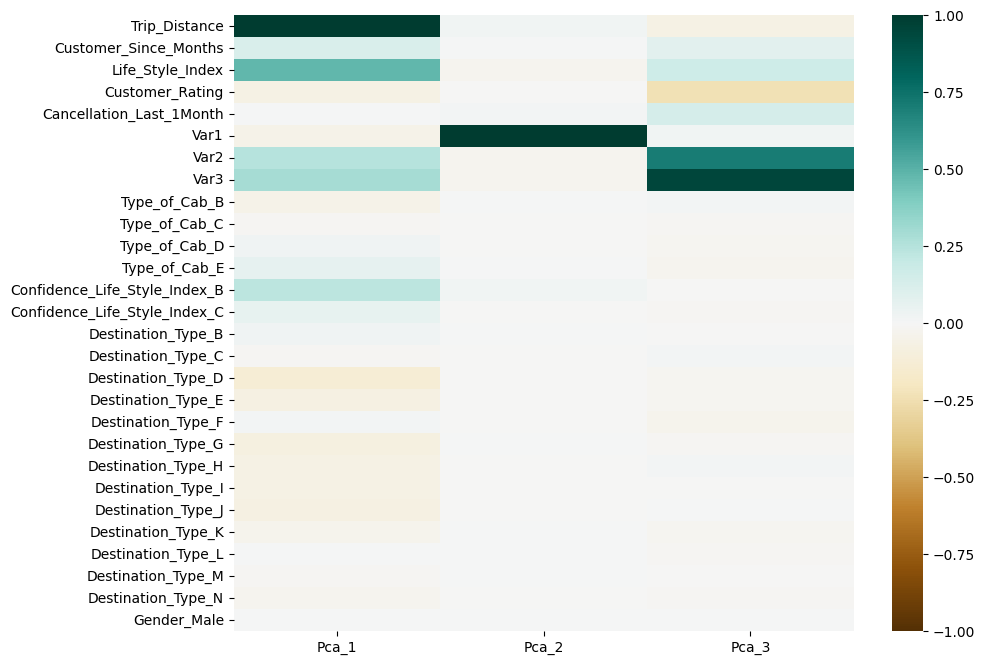

In [14]:
pca_1_corrs = X.corrwith(X_pca3['Pca_1'])
pca_2_corrs = X.corrwith(X_pca3['Pca_2'])
pca_3_corrs = X.corrwith(X_pca3['Pca_3'])

corrs = pd.concat((pca_1_corrs, pca_2_corrs, pca_3_corrs), axis = 1)
corrs.columns = ['Pca_1', 'Pca_2', 'Pca_3']

plt.figure(figsize = (10,8))
sns.heatmap(corrs,
            xticklabels = corrs.columns,
            yticklabels = corrs.index,
            cmap = 'BrBG',
            vmin = -1,
            vmax = 1)

In [15]:
pca_3_corrs[pca_3_corrs >= 0.5]

Var2    0.705159
Var3    0.951081
dtype: float64

In [16]:
X_pca3.corr()

,Pca_1,Pca_2,Pca_3
Pca_1,1.000000e+00,1.015532e-16,5.157176e-18
Pca_2,1.015532e-16,1.000000e+00,-5.222627e-17
Pca_3,5.157176e-18,-5.222627e-17,1.000000e+00


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [17]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [20]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = 2)),
                 ('LR',LogisticRegression())])

In [22]:
### Your code is here

param_grid = {'LR__penalty': ['l1', 'l2', 'elasticnet'],
              'LR__C': [1e-5, 0.0001, 0.001, 0.01]}
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train, y_train)





GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': [1e-05, 0.0001, 0.001, 0.01],
                         'LR__penalty': ['l1', 'l2', 'elasticnet']})

In [23]:
print(f'Best params:\t {grid.best_params_}')
print(f'Best score: \t{grid.best_score_}')
print(f'Classification report: \t{classification_report(y_test, grid.predict(X_test),digits = 3)}')

Best params:	 {'LR__C': 0.0001, 'LR__penalty': 'l2'}
Best score: 	0.4809216953785498
Classification report: 	              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



In [26]:
pipe_1 = Pipeline([('scaler', StandardScaler()),
                   ('LR', LogisticRegression())])
grid_1 = GridSearchCV(pipe_1, param_grid, cv = 5)
grid_1.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': [1e-05, 0.0001, 0.001, 0.01],
                         'LR__penalty': ['l1', 'l2', 'elasticnet']})

In [27]:
print(f'Best params:\t {grid_1.best_params_}')
print(f'Best score: \t{grid_1.best_score_}')
print(f'Classification report: \t{classification_report(y_test, grid_1.predict(X_test),digits = 3)}')

Best params:	 {'LR__C': 0.001, 'LR__penalty': 'l2'}
Best score: 	0.6803919317784358
Classification report: 	              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке.


In [28]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])

    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}

    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)

    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'],
            report['weighted avg']['f1-score'])

In [29]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:

    ### Your code is here
    accuracy, f1_score = train_pca_i(n_components,X_train, y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1_score


CPU times: user 3min 7s, sys: 39.5 s, total: 3min 46s
Wall time: 4min 1s


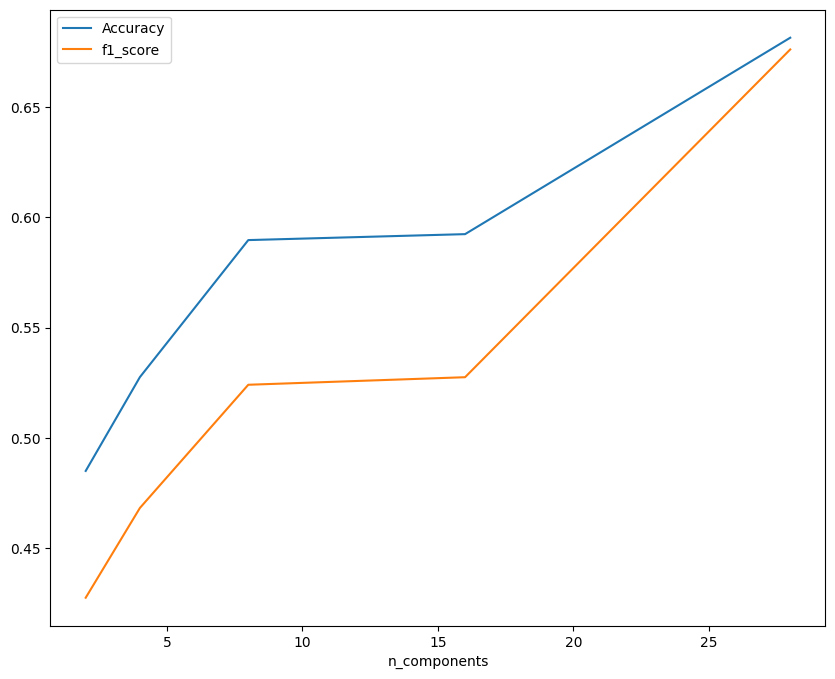

In [30]:
plt.figure(figsize = (10,8))
plt.plot(components_list, accuracy_dict.values(), label = 'Accuracy')
plt.plot(components_list, f1_score_dict.values(), label = 'f1_score')

plt.xlabel('n_components')
plt.legend()
plt.show()

In [32]:
round(f1_score_dict[28],3)

0.676

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов.

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [ ]:
from sklearn.manifold import TSNE

### Your code is here
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_centered)
X_tsne = pd.DataFrame(X_tsne, columns = ['Tsne_1', 'Tsne_2'])

X_tsne.head()

,Tsne_1,Tsne_2
0,-60.341755,-101.622093
1,-6.508125,-93.715508
2,4.788477,-18.337389
3,49.446091,2.625887
4,31.748241,-53.939156


In [ ]:
X_tsne['target'] = y
X_tsne['target'].unique()

In [ ]:
fig = plt.figure()
fig.set_size_inches(16,10)
sns.scatterplot(X_tsne,
                x ='Tsne_1',
                y = 'Tsne_2',
                hue = 'target')

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [ ]:
### Your code is here
tsne_3d = TSNE(n_components = 3)
X_tsne_3d = tsne_3d.fit_transform(X_centered)
X_tsne_3d = np.concatenate((X_tsne_3d.values, y.values.reshape(-1,1)), axis = 1)
X_tsne_3d = pd.DataFrame(X_tsne_3d, columns = ['Tsne_1', 'Tsne_2', 'Tsne_3', 'Target'])


In [ ]:
fig = plt.figure(figsize = (10,8))
ax = plt.axes(prjection = '3d')

colors = X_tsne_3d['target'].replace([1,2,3], ['green', 'red', 'blue'])

ax.scatter3D(X_tsne_3d['Tsne_1'],
             X_tsne_3d['Tsne_2'],
             X_tsne_3d['Tsne_3'],
             c = colors)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!